# Deep Learning (Tensorflow)

#### TL; DR
to develop a deeper understanding of how neural nets & deep neural networks work, what their advantages and disadvantages are and what are their use cases

### Reference

#### Disadvantages
- during training tends to overfit 



## Simple NN

In [1]:
import tensorflow.keras as keras
import tensorflow as tf

import matplotlib.pyplot as plt

import os
import cv2
from tqdm import tqdm

print(tf.__version__)

1.13.1


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

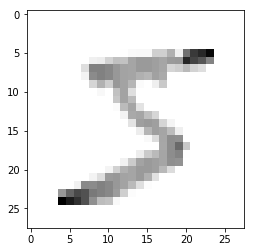

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # relu is default
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
             optimizer='adam', # adam good default
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2588 - acc: 0.9247
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1051 - acc: 0.9678
Epoch 3/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0748 - acc: 0.9765


In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0980 - acc: 0.9688
0.09803575825095177 0.9688


In [7]:
model.save('epic_num_reader.model')

In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [9]:
predictions = model.predict([x_test])

In [10]:
predictions

array([[1.42984389e-08, 3.35673860e-07, 6.11064243e-05, ...,
        9.98327315e-01, 1.18807691e-06, 2.08792380e-06],
       [1.20439804e-11, 4.88824953e-05, 9.99946594e-01, ...,
        7.08635095e-10, 1.15405875e-07, 1.18914037e-12],
       [1.33178480e-06, 9.99698877e-01, 1.56419901e-05, ...,
        7.35028516e-05, 1.67514663e-04, 1.87102933e-06],
       ...,
       [5.49592798e-08, 1.02599881e-06, 4.48556854e-08, ...,
        1.15946059e-05, 7.83352789e-06, 3.85867053e-04],
       [1.86960472e-06, 6.78289052e-06, 5.19779348e-07, ...,
        2.64774656e-07, 5.32231003e-04, 1.03177520e-08],
       [3.06729589e-06, 1.87717752e-08, 7.61340289e-06, ...,
        5.07471309e-09, 6.18023591e-07, 1.37067193e-08]], dtype=float32)

In [11]:
import numpy as np

print(np.argmax(predictions[0]))

7


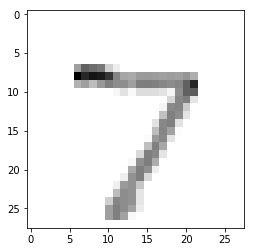

In [12]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

### Part 2: Dog & Cats

Some notes:

- we convert the images to grayscale in order for efficiency

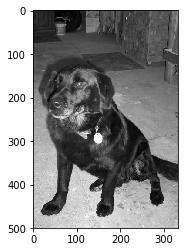

In [14]:
DATADIR = "./data/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

We need to resize the images (pixelate) in order to standardize the size/shapes

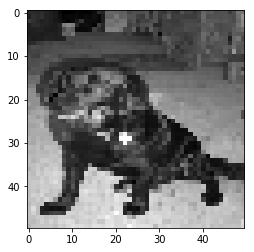

In [21]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [26]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category) # set target labels "Dog" & "Cat" to numerical value targets
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize each pic
                training_data.append([new_array, class_num]) # append resizes image arrays & categorical labels
            except Exception as e:
                pass

create_training_data()

In [27]:
print(len(training_data))

24946


In [28]:
import random

random.shuffle(training_data)

In [30]:
for sample in training_data[:5]:
    print(sample[1])

1
1
1
1
1


In [33]:
X = []
y = []

In [35]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1) # reshape in order for keras to feed in

In [39]:
# import pickle

# pickle_out = open("./data/PetImages/X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("./data/PetImages/y_pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [40]:
pickle_in = open("./data/PetImages/X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("./data/PetImages/y_pickle", "rb")
y = pickle.load(pickle_in)